# 9 Paper Figures

The goal of the following notebook is to generate the figures included in our manuscript
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from glob import glob
import json
from plot_utils import plot_errorbars

In [17]:
OUTPUT_PATH = '../results/imgs'

SAVE_FIGS = True

# Main Experiment

#### Parameters

In [ ]:
path_results_total_co2_osm = "../results/osm/results_total_co2_osm.json"
path_results_total_co2_tomtom = "../results/tomtom/results_total_co2_tomtom.json"

path_results_alpha_osm = "../results/osm/results_alpha_osm.json"
path_results_alpha_tomtom = "../results/tomtom/results_alpha_tomtom.json"

path_results_gini_osm = "../results/osm/results_gini_osm.json"
path_results_gini_tomtom = "../results/tomtom/results_gini_tomtom.json"

### Loading experiments' results

In [ ]:
## CO2 on each road ##

navigator = 'OSM'  # specify "OSM" or "TT"

###

if navigator == 'OSM':
    f = open('../results/dict_exps_filename_osm.json')
    dict_exps_filename = json.load(f)
    DATA_PATH = '../sim_outputs/outputs_main_experiment/exps_osm/'
elif navigator == 'TT':
    f = open('../results/tomtom/dict_exps_filename_tomtom.json')
    dict_exps_filename = json.load(f)
    DATA_PATH = '../sim_outputs/exps_tomtom/'
else:
    raise ValueError('not a valid navigator.')
    

map__scenario__results = {}
for c_scenario, c_dict_results in dict_exps_filename.items():
    c_scenario_number = int(c_scenario.split('_')[0])
    c_list_scenario_results = []
    for c_rep, c_file in c_dict_results.items():
        c_df = pd.read_csv(glob(DATA_PATH + c_file + "/co2_edge.csv")[0])
        #print(c_df)
        c_list_scenario_results.append(list(c_df['total_co2']))
    map__scenario__results[c_scenario_number] = c_list_scenario_results

    
# dict with mean co2 per road across the 10 repetitions
map__scenario__mean_results = {scenario: np.array(pd.DataFrame(vec_res).mean()) for scenario, vec_res in map__scenario__results.items()}

In [ ]:
## Total CO2 and alpha ##

map__navig__scenario__overallCO2 = {}
map__navig__scenario__alpha = {}
map__navig__scenario__gini = {}


## Total CO2

# OSM
f = open(path_results_total_co2_osm)
map__scenario__overallco2 = json.load(f)
map__navig__scenario__overallCO2['OSM'] = {int(key.split('_')[0]): value for key,value in map__scenario__overallco2.items()}

# TomTom
f = open(path_results_total_co2_tomtom)
map__scenario__overallco2 = json.load(f)
map__navig__scenario__overallCO2['TT'] = {int(key.split('_')[0]): value for key,value in map__scenario__overallco2.items()}


## Alphas

# OSM
f = open(path_results_alpha_osm)
map__scenario__alpha = json.load(f)
map__navig__scenario__alpha['OSM'] = {int(key.split('_')[0]): value for key,value in map__scenario__alpha.items()}

# TomTom
f = open(path_results_alpha_tomtom)
map__scenario__alpha = json.load(f)
map__navig__scenario__alpha['TT'] = {int(key.split('_')[0]): value for key,value in map__scenario__alpha.items()}


## Ginis

# OSM
f = open(path_results_gini_osm)
map__scenario__gini = json.load(f)
map__navig__scenario__gini['OSM'] = {int(key.split('_')[0]): value for key,value in map__scenario__gini.items()}

# TomTom
f = open(path_results_gini_tomtom)
map__scenario__gini = json.load(f)
map__navig__scenario__gini['TT'] = {int(key.split('_')[0]): value for key,value in map__scenario__gini.items()}



### CCDFs
Code for plotting Figure 3.

In [ ]:
from plot_utils import plot_one_ccdf_per_istance

# modifying the keys [10,...,100] to [1,...,10]
map__scenario_as_int__mean_results = {int(scenario/10): map__scenario__mean_results[scenario] for scenario in map__scenario__mean_results.keys()}

fig, ax = plot_one_ccdf_per_istance(map__scenario__mean_results, 
                                    xaxis_label=r'$CO_2$ per road (mg)', title=None,
                                    cmap_name='coolwarm', 
                                    show_legend=True, 
                                    legend_title="%s-routed " %navigator + "\n(%)",   #r"$i$ of $\overline{D}^{(%s)}_{i}$" %navigator
                                    plot_zoom=True, 
                                    xlims_zoom=(8*10e6, 10e8), ylims_zoom=(8e-1*10e-5, 2e-1*10e-3), ## play with these pars to change the zoom
                                    figsize=(8,6))

if SAVE_FIGS: 
    plt.savefig(OUTPUT_PATH + "plot_ccdf_%s__AVG_across_repetitions__INSET_ZOOM__V2.png" %navigator, dpi=300)
    plt.savefig(OUTPUT_PATH + "plot_ccdf_%s__AVG_across_repetitions__INSET_ZOOM__V2.pdf" %navigator)

### Gini index
Code for plotting Figure 4a.

In [ ]:
from plot_utils import plot_errorbars

# modifying the keys [10,...,100] to [1,...,10]
map__navig__scenario__overallCO2__ = {}
for navig in map__navig__scenario__gini.keys():
    map__navig__scenario__overallCO2__[navig] = {int(scenario/10): map__navig__scenario__gini[navig][scenario] for scenario in map__navig__scenario__gini[navig].keys()}
#

fig, ax = plot_errorbars(map__navig__scenario__gini, 
                         plot_mean=True, 
                         x_label=r"$R$-routed (%)", #r"$i$ of $\overline{D}^{(R)}_{i}$"
                         y_label=r"Gini", 
                         figsize=(6,6))
ax.set_ylim(0.855,0.88)

if SAVE_FIGS:
    plt.savefig(OUTPUT_PATH + "plot_errorbars_gini__V2.png", dpi=300)
    plt.savefig(OUTPUT_PATH + "plot_errorbars_gini__V2.pdf")

### Total CO$_2$
Code for plotting Figure 4b.

In [ ]:
from plot_utils import plot_errorbars

# modifying the keys [10,...,100] to [1,...,10]
map__navig__scenario__overallCO2__ = {}
for navig in map__navig__scenario__overallCO2.keys():
    map__navig__scenario__overallCO2__[navig] = {int(scenario/10): map__navig__scenario__overallCO2[navig][scenario] for scenario in map__navig__scenario__overallCO2[navig].keys()}
#

fig, ax = plot_errorbars(map__navig__scenario__overallCO2, 
                         plot_mean=True, 
                         x_label=r"$R$-routed (%)", #r"$i$ of $\overline{D}^{(R)}_{i}$"
                         y_label=r"Total CO$_2$ (mg)", 
                         figsize=(6,6))

if SAVE_FIGS:
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_AVG_total_co2__V2.png', dpi=300)
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_AVG_total_co2__V2.pdf')

### Truncated power-law's exponent $\alpha$
Code for plotting Figure A.1.

In [ ]:
from plot_utils import plot_errorbars

# modifying the keys [10,...,100] to [1,...,10]
map__navig__scenario__alpha__ = {}
for navig in map__navig__scenario__alpha.keys():
    map__navig__scenario__alpha__[navig] = {int(scenario/10): map__navig__scenario__alpha[navig][scenario] for scenario in map__navig__scenario__alpha[navig].keys()}
#

fig, ax = plot_errorbars(map__navig__scenario__alpha, 
                         plot_mean=True, 
                         x_label=r"$R$-routed (%)", #r"$i$ of $\overline{D}^{(R)}_{i}$"
                         y_label=r"Exponent $\mathbf{\alpha}$ of tr. power-law", 
                         figsize=(6,6))

if SAVE_FIGS:
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_AVG_alpha__V2.png', dpi=300)
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_AVG_alpha__V2.pdf')

# Experiment $w$ factor


#### parameters

In [14]:
path_results_total_co2_osm_w = "../results/dict_total_co2_osm_w.json"
path_results_total_co2_tomtom_w = "../results/dict_total_co2_tomtom_w.json"

path_results_alpha_osm_w = "../results/dict_alpha_osm_w.json"
path_results_alpha_tomtom_w = "../results/results_alpha_tomtom_w.json"

path_results_gini_osm_w = "../results/dict_gini_osm_w.json"
path_results_gini_tomtom_w = "../results/results_gini_tomtom_w.json"

In [15]:
## Total CO2
map__navig__scenario__overallCO2_osm = {}
map__navig__scenario__overallCO2_tomtom = {}

# OSM
f = open(path_results_total_co2_osm_w)
map__scenario__overallco2_osm = json.load(f)

# TomTom
f = open(path_results_total_co2_tomtom_w)
map__scenario__overallco2_tomtom = json.load(f)


## Gini
map__navig__scenario__overallGINI_osm = {}
map__navig__scenario__overallGINI_tomtom = {}

# OSM
f = open("../results/dict_gini_osm_w.json")
map__navig__scenario__gini_osm = json.load(f)

# TomTom
f = open("../results/dict_gini_tomtom_w.json")
map__navig__scenario__gini_tomtom = json.load(f)


# Travel Time
map__navig__scenario__overallTT_osm = {}
map__navig__scenario__overallTT_tomtom = {}

# OSM
f = open("../results/dict_tt_osm_w.json")
map__navig__scenario__tt_osm = json.load(f)

# TomTom
f = open("../results/dict_tt_tomtom_w.json")
map__navig__scenario__tt_tomtom = json.load(f)
    

### Gini index
Figures 6a and 6d.

#### 6a (OSM)

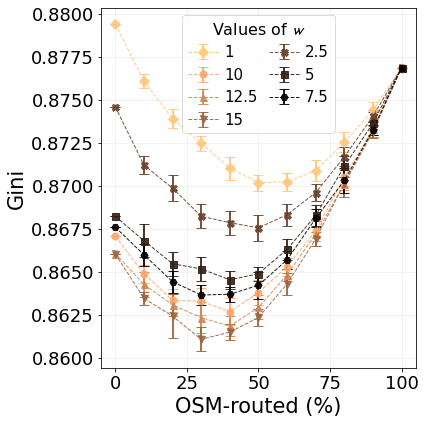

In [19]:
navigator = "OSM"

for w in map__navig__scenario__gini_osm:
    map__navig__scenario__overallGINI_osm[w.replace("p",".")] = {int(key.split('_')[0]): value for key,value in map__navig__scenario__gini_osm[w].items()}


fig, ax = plot_errorbars(map__navig__scenario__overallGINI_osm, 
                         plot_mean=True, 
                         x_label=r"%s-routed" %navigator + " (%)",
                         y_label="Gini", 
                         cmap_name='copper_r',
                         legend_loc = 'best', legend_title=r'Values of $\mathcal{w}$', legend_cols=2,
                         figsize=(6,6))

if SAVE_FIGS:
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_w_analysis_gini_%s.png' %navigator, dpi=300)
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_w_analysis_gini_%s.pdf' %navigator)

#### 6d (TomTom)

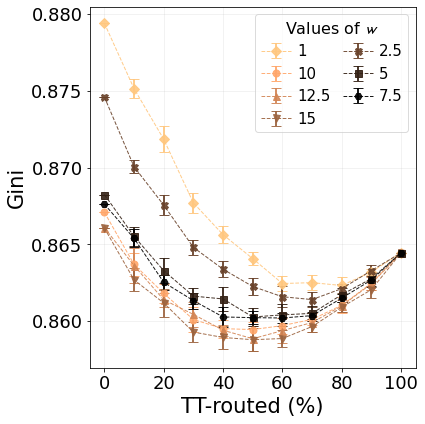

In [20]:
navigator = "TT"

for w in map__navig__scenario__gini_tomtom:
    map__navig__scenario__overallGINI_tomtom[w.replace("p",".")] = {int(key.split('_')[0]): value for key,value in map__navig__scenario__gini_tomtom[w].items()}


fig, ax = plot_errorbars(map__navig__scenario__overallGINI_tomtom, 
                         plot_mean=True, 
                         x_label=r"%s-routed" %navigator + " (%)",
                         y_label="Gini", 
                         cmap_name='copper_r',
                         legend_loc = 'best', legend_title=r'Values of $\mathcal{w}$', legend_cols=2,
                         figsize=(6,6))

if SAVE_FIGS:
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_w_analysis_gini_%s.png' %navigator, dpi=300)
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_w_analysis_gini_%s.pdf' %navigator)

### Total CO2
Figures 6b and 6e.

#### 6b (OSM)

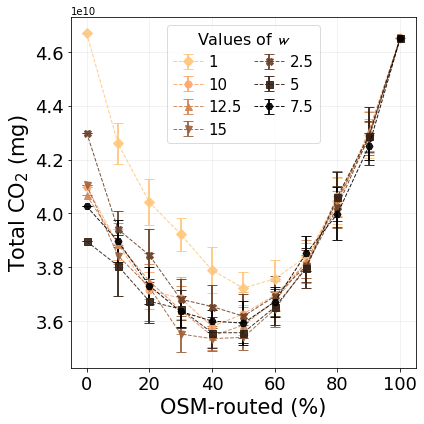

In [22]:
for w in map__scenario__overallco2_osm:
    map__navig__scenario__overallCO2_osm[w.replace("p",".")] = {int(key.split('_')[0]): value for key,value in map__scenario__overallco2_osm[w].items()}
    
fig, ax = plot_errorbars(map__navig__scenario__overallCO2_osm, 
                         plot_mean=True, 
                         x_label=r"OSM-routed" + " (%)", #r"$i$ of $\overline{D}^{(%s)}_{i}$" %navigator
                         y_label=r"Total CO$_2$ (mg)", 
                         cmap_name='copper_r',
                         legend_loc = 'best', legend_title=r'Values of $\mathcal{w}$', legend_cols=2,
                         figsize=(6,6))

if SAVE_FIGS:
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_w_analysis_totalco2_osm.png', dpi=300)
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_w_analysis_totalco2_osm.pdf')

#### 6e (TomTom)

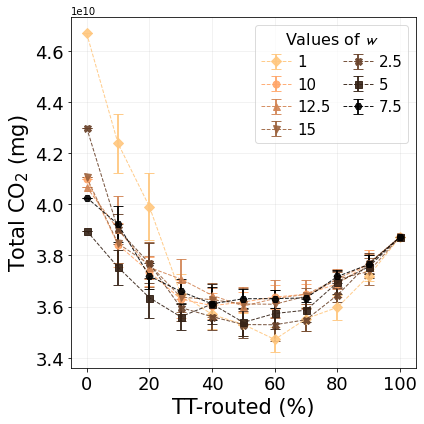

In [23]:
for w in map__scenario__overallco2_tomtom:
    map__navig__scenario__overallCO2_tomtom[w.replace("p",".")] = {int(key.split('_')[0]): value for key,value in map__scenario__overallco2_tomtom[w].items()}
    
fig, ax = plot_errorbars(map__navig__scenario__overallCO2_tomtom, 
                         plot_mean=True, 
                         x_label=r"TT-routed" + " (%)", #r"$i$ of $\overline{D}^{(%s)}_{i}$" %navigator
                         y_label=r"Total CO$_2$ (mg)", 
                         cmap_name='copper_r',
                         legend_loc = 'best', legend_title=r'Values of $\mathcal{w}$', legend_cols=2,
                         figsize=(6,6))

if SAVE_FIGS:
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_w_analysis_totalco2_tomtom.png', dpi=300)
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_w_analysis_totalco2_tomtom.pdf')

### Travel Time
Figures 6c and 6f.

#### 6c (OSM)

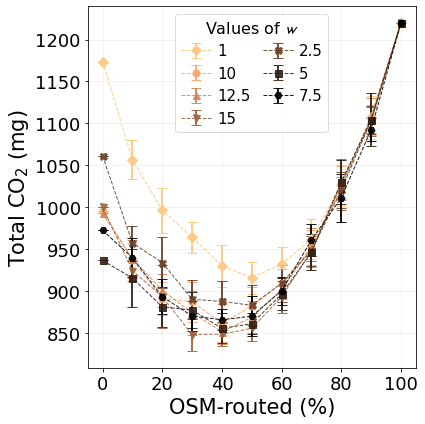

In [27]:
for w in map__navig__scenario__tt_osm:
    map__navig__scenario__overallTT_osm[w.replace("p",".")] = {int(key.split('_')[0]): value for key,value in map__navig__scenario__tt_osm[w].items()}
    
fig, ax = plot_errorbars(map__navig__scenario__overallTT_osm, 
                         plot_mean=True, 
                         x_label=r"OSM-routed" + " (%)", #r"$i$ of $\overline{D}^{(%s)}_{i}$" %navigator
                         y_label=r"Total CO$_2$ (mg)", 
                         cmap_name='copper_r',
                         legend_loc = 'best', legend_title=r'Values of $\mathcal{w}$', legend_cols=2,
                         figsize=(6,6))

if SAVE_FIGS:
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_w_analysis_traveltime_osm.png', dpi=300)
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_w_analysis_traveltime_osm.pdf')

#### 6f (TomTom)

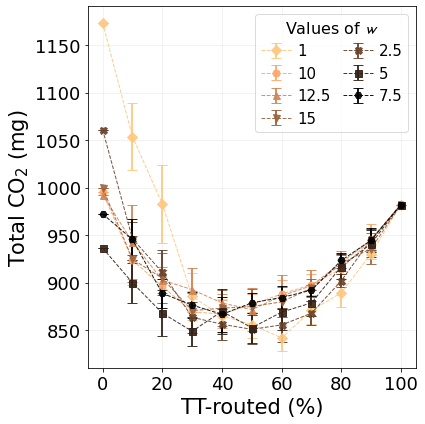

In [26]:
for w in map__navig__scenario__tt_tomtom:
    map__navig__scenario__overallTT_tomtom[w.replace("p",".")] = {int(key.split('_')[0]): value for key,value in map__navig__scenario__tt_tomtom[w].items()}
    
fig, ax = plot_errorbars(map__navig__scenario__overallTT_tomtom, 
                         plot_mean=True, 
                         x_label=r"TT-routed" + " (%)", #r"$i$ of $\overline{D}^{(%s)}_{i}$" %navigator
                         y_label=r"Total CO$_2$ (mg)", 
                         cmap_name='copper_r',
                         legend_loc = 'best', legend_title=r'Values of $\mathcal{w}$', legend_cols=2,
                         figsize=(6,6))

if SAVE_FIGS:
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_w_analysis_traveltime_tomtom.png', dpi=300)
    plt.savefig(OUTPUT_PATH + '/plot_errorbars_w_analysis_traveltime_tomtom.pdf')